# Fast Affine Alignment of Brain Scan to MNI space

This notebook aligns a brain image (MRI, CT) to the [T1w MNI atlas](https://ndownloader.figshare.com/files/25595000/mb_avg218T1.nii.gz), available in NITorch. The registration uses a Powell optimizer and an NMI cost function, with some tricks to make the implementation more robust. The registration does rigid+isotropic scaling alignment.

The registration can run both on the CPU and on the GPU. On a descent GPU, for an image with dimensions around 256x256x256, the registration should take a few seconds. On the CPU, it might be closer to half a minute.

Note, for CT images, the affine matrix in the header can be messed up so that the initial alignment between atlas and image is too large. In this case, try using:
```py
from nitorch.tools.preproc import reset_origin
```
before doing the atlas registration.

The atlas was built using the [multi-brain toolbox](https://github.com/WTCN-computational-anatomy-group/mb). This toolbox is not organ-specific, meaning it can be used to build atlases of any organs, which can then be plugged in to the `atlas_align` function of NITorch for doing atlas alignment of organs other than brains.

In [1]:
import time
from nitorch import io
from nitorch.tools.preproc import atlas_align
from nitorch.core.datasets import fetch_data
from nitorch.plot import show_slices

In [2]:
# Parameters
pth_mov = "Moving.nii.gz"
device = "cuda"  # cpu|cuda
figsize = (10, 4)

dat_mov.shape=torch.Size([256, 256, 150])


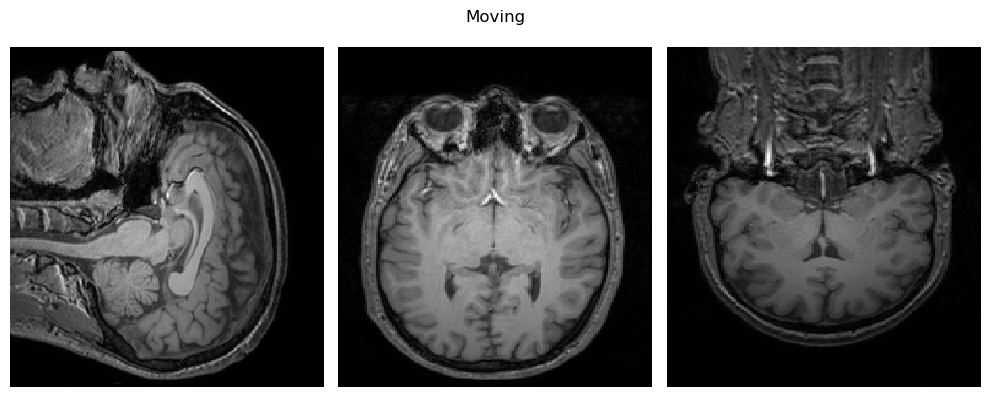

In [3]:
# Load moving image
nii_mov = io.map(pth_mov)
dat_mov = nii_mov.fdata(device=device)
mat_mov = nii_mov.affine.to(device)

# Visualise moving before alignment
print(f"dat_mov.shape={dat_mov.shape}")
_ = show_slices(dat_mov, figsize=figsize, title="Moving")

In [4]:
# Run the atlas registration and get the moving image after alignemnt, resliced to the atlas space
start_time = time.time()
dat_mov_atlas = atlas_align([dat_mov, mat_mov], rigid=False, device=device, default_atlas="atlas_t1")[0]
print(f"Registration finished in {(time.time() - start_time):.1f} seconds")

Registration finished in 5.4 seconds


dat_mov_atlas.shape=torch.Size([197, 314, 325])


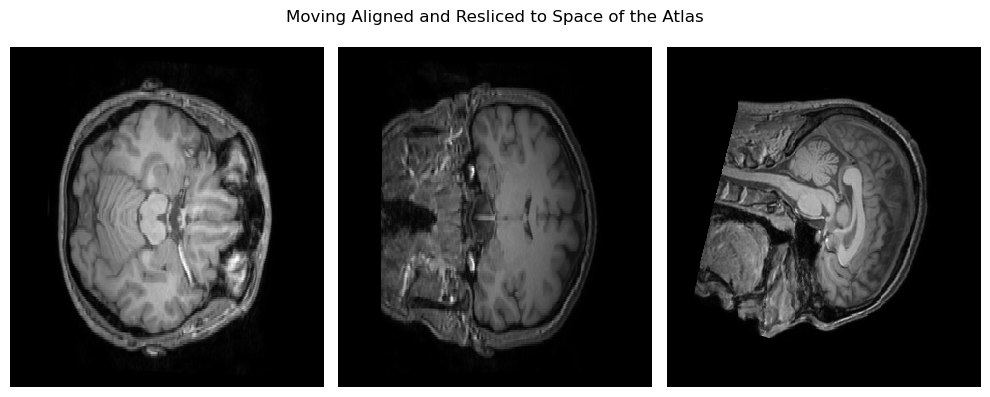

In [5]:
# Visualise moving after alignment (resliced to the space of the atlas)
print(f"dat_mov_atlas.shape={dat_mov_atlas.shape}")
_ = show_slices(dat_mov_atlas, figsize=figsize, title="Moving Aligned and Resliced to Space of the Atlas")

dat_atlas.shape=torch.Size([197, 314, 325])


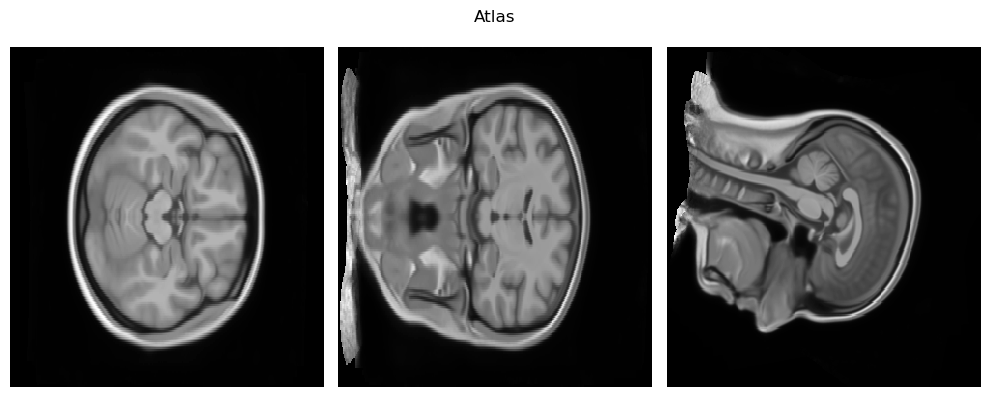

In [6]:
# Load the atlas
pth_atlas = fetch_data(name="atlas_t1")
nii_atlas = io.map(pth_atlas)
dat_atlas = nii_atlas.fdata(device=device)

# Visualise the atlas
print(f"dat_atlas.shape={dat_atlas.shape}")
_ = show_slices(dat_atlas, figsize=figsize, title="Atlas")